# The Cost of Homeschooling: Data Analysis
# By: Mitchell Pudil
# For Assistantship with Dr. Joseph Price at BYU
## Languages: R and Stata

## Abstract: 

Despite that fact that over 2 million children in the US are home schooled each year, very little is known about the factors that influence the decision to home school children. We use data from the 2003, 2007, 2012, and 2016 National Center for Education Statistics (NCES) Parent and Family Involvement in Education Surveys to examine the characteristics of parents that decide to homeschool. We find that homeschooling is more likely to occur in larger families with lower levels of income and with mothers who have received higher levels of education. We find that home schooling parents provide a net savings to the government of about $18 billion each year.


## Import and look at data

In [4]:
#Define Dataset: "homeschooldata"
homeschooldata <- read.csv("homeschooldata.csv")
head(homeschooldata)
homeschooldata <- na.omit(homeschooldata)
homeschooldata$hvalue <- ifelse(homeschooldata$homeschool==1, "Homeschooled", "Not Homeschooled")

year,homeschool,lnhhinc,momed,maritalmom,momage,cage,numsib,cmale,cunited,⋯,zip,religious,hhinc,meducation,evermarried,educ_evermarried,marriedmom,mothered,marrieded,hvalue
2003,0,10.9151,3,1,37,8,2,1,1,⋯,3,1,55000,15,1,15,1,15,15,Not Homeschooled
2003,0,10.5321,2,1,36,16,2,0,1,⋯,1,1,37500,13,1,13,1,13,13,Not Homeschooled
2003,0,10.5321,2,1,36,10,2,0,1,⋯,1,1,37500,13,1,13,1,13,13,Not Homeschooled
2003,0,11.3794,5,1,39,8,2,1,1,⋯,2,0,87500,20,1,20,1,20,20,Not Homeschooled
2003,0,11.3794,5,1,39,6,2,1,1,⋯,2,0,87500,20,1,20,1,20,20,Not Homeschooled
2003,0,10.0213,2,1,30,12,1,1,0,⋯,1,1,22500,13,1,13,1,13,13,Not Homeschooled


Note that this data has been pre-cleaned in earlier stages, so there is not too much more cleaning that needs to occur. 

## Create train and test data sets

In [5]:
set.seed(12)
n <- dim(homeschooldata)[1]
sample.rows <- sample(1:n,20000, replace=FALSE)
homeschool.train <- homeschooldata[c(sample.rows),]
homeschool.test <- homeschooldata[-c(sample.rows),]

## Summary Statistics and assure similarity between train and test datasets


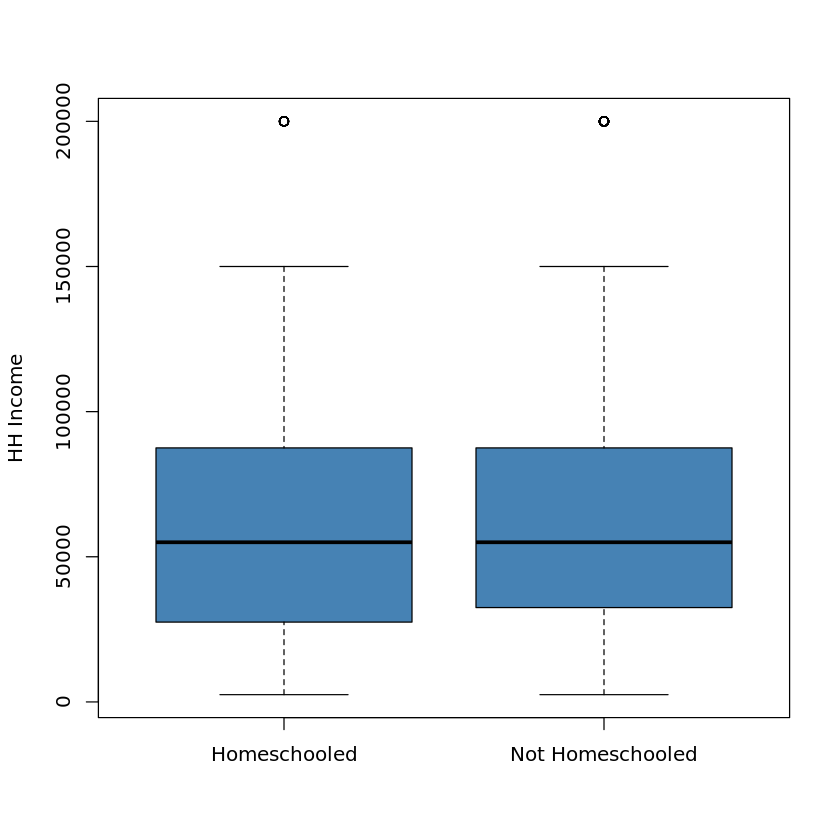

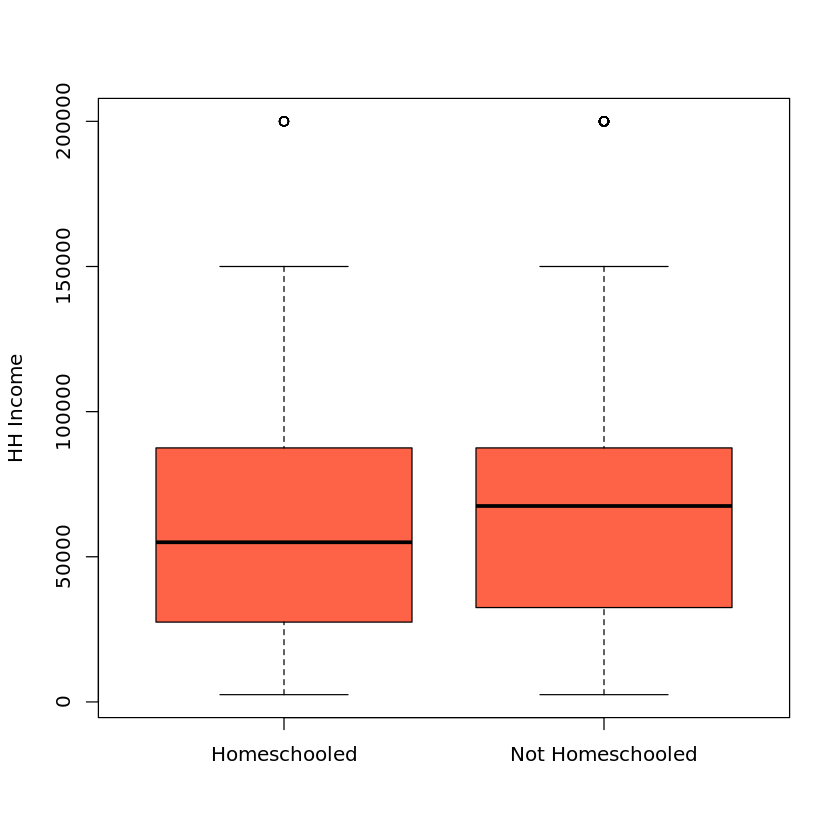

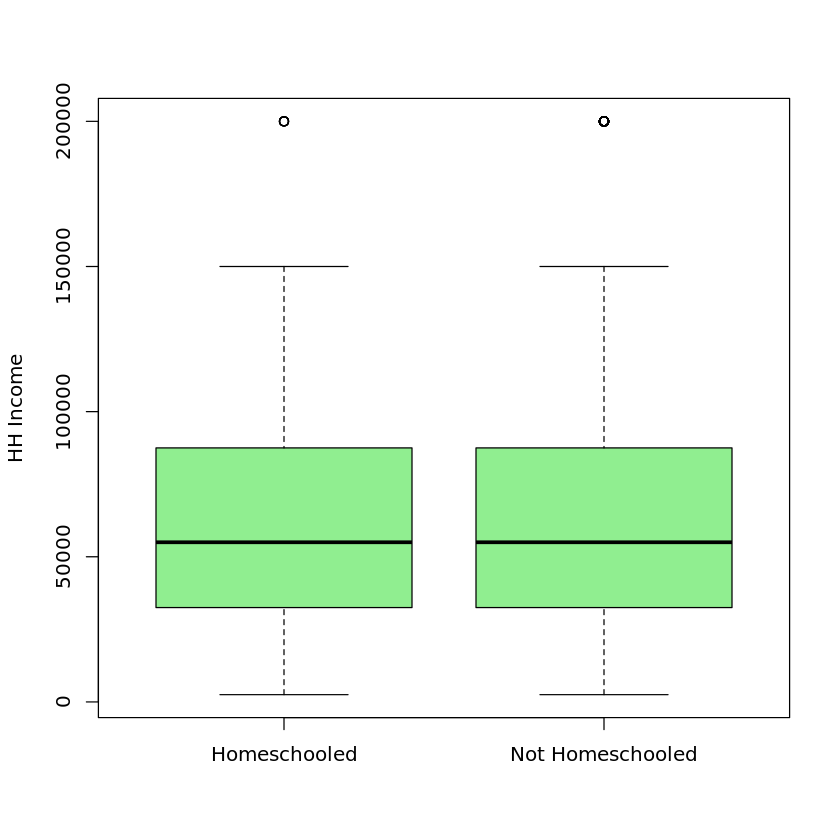

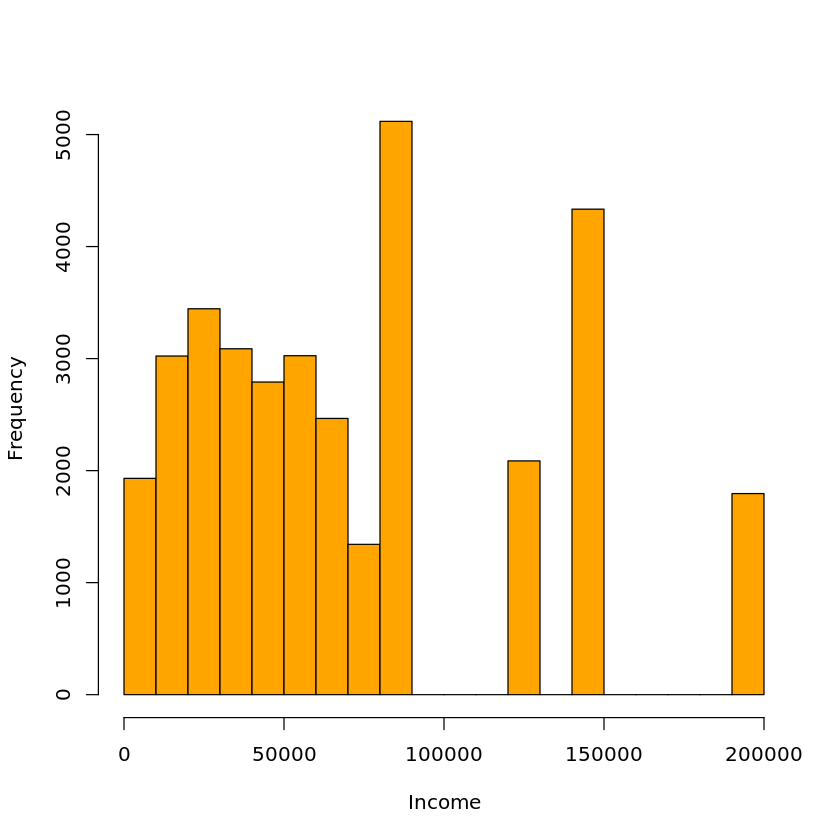

In [6]:
boxplot(hhinc~hvalue, data=homeschooldata, col="steel blue", labels=c("Not Homeschooled", "Homeschooled"), ylab="HH Income")
boxplot(hhinc~hvalue, data=homeschool.train, col="tomato", labels=c("Not Homeschooled", "Homeschooled"), ylab="HH Income")
boxplot(hhinc~hvalue, data=homeschool.test, col="light green", labels=c("Not Homeschooled", "Homeschooled"), ylab="HH Income")

hist(homeschooldata$hhinc, col="orange", xlab="Income", main="")    # Data are similar, so we continue.


## Model 1: Full data model
response variable is Homeschool = 1 if student is homeschooled
Model: logit(homeschool = 1) = b0 + b1*ln(income) + b2*parentsEducation+ b3*Age + othervars + e

In [8]:
out.homeschool <- glm(homeschool ~ lnhhinc + momed + momage + cage + numsib + factor(cmale) + factor(cwhite) + factor(cblack) + factor(region) + factor(religious) , data=homeschool.train, family="binomial") 
summary(out.homeschool)


Call:
glm(formula = homeschool ~ lnhhinc + momed + momage + cage + 
    numsib + factor(cmale) + factor(cwhite) + factor(cblack) + 
    factor(region) + factor(religious), family = "binomial", 
    data = homeschool.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6739  -0.2340  -0.1904  -0.1545   3.3598  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.829e+00  5.639e-01  -3.243 0.001183 ** 
lnhhinc            -3.658e-01  5.101e-02  -7.171 7.43e-13 ***
momed               1.164e-01  4.812e-02   2.418 0.015595 *  
momage              1.776e-02  8.296e-03   2.141 0.032267 *  
cage               -2.711e-02  1.491e-02  -1.819 0.068986 .  
numsib              2.849e-01  4.450e-02   6.403 1.52e-10 ***
factor(cmale)1     -2.523e-01  9.740e-02  -2.591 0.009579 ** 
factor(cwhite)1     5.802e-01  1.293e-01   4.487 7.21e-06 ***
factor(cblack)1    -5.482e-01  2.267e-01  -2.418 0.015611 *  
factor(region)2     5.401e-

### Calculate 95% Confidence Intervals

In [9]:
# 95% CI on beta
confint(out.homeschool)
# 95% CI on exp(beta)
exp(confint(out.homeschool))[-1,]

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-2.949633033,-0.738608993
lnhhinc,-0.464347173,-0.264309220
momed,0.021993613,0.210654607
momage,0.001378891,0.033896087
cage,-0.056280777,0.002162114
numsib,0.196737551,0.371226361
factor(cmale)1,-0.443957603,-0.061873552
factor(cwhite)1,0.330865177,0.838148977
factor(cblack)1,-1.009884386,-0.117748046
factor(region)2,0.250739835,0.843680701


Waiting for profiling to be done...


,2.5 %,97.5 %
lnhhinc,0.6285453,0.7677361
momed,1.0222373,1.2344859
momage,1.0013798,1.0344771
cage,0.9452737,1.0021645
numsib,1.2174245,1.4495111
factor(cmale)1,0.6414926,0.9400017
factor(cwhite)1,1.3921721,2.3120833
factor(cblack)1,0.3642611,0.8889200
factor(region)2,1.2849757,2.3249085
factor(region)3,0.7131898,1.4095899


## Define training set for the response 
#Note that the maximum probability here of a child being homeschooled  is 0.238, i.e., there is nobody who is overall more likely to be homeschooled than not homeschooled.

In [10]:
yhat.train <- as.numeric(predict(out.homeschool, type="response") > 0.5)  

### Determine misclassification rates

In [11]:
table(yhat.train, homeschool.train$homeschool) 
misclass <- 429/(dim(homeschooldata)[1]) #proportion of "TRUE positive"
sensitivity <- 0 / 429  #proportion of "TRUE positive"
specificity <- 19552/(19552+0)    #proportion of TRUE negatives" (we said they would lose and they actually did)

list(misclassification=misclass, sensitivity=sensitivity, specificity=specificity)


          
yhat.train     0     1
         0 19560   440

$misclassification
[1] 0.01245428

$sensitivity
[1] 0

$specificity
[1] 1

In this model, we find that all our predictions were 0 (that no student was homeschooled)

### Demonstrate effect of Income on P(homeschool) holding all else at median values

1 
0.02519342

1 
0.03755835

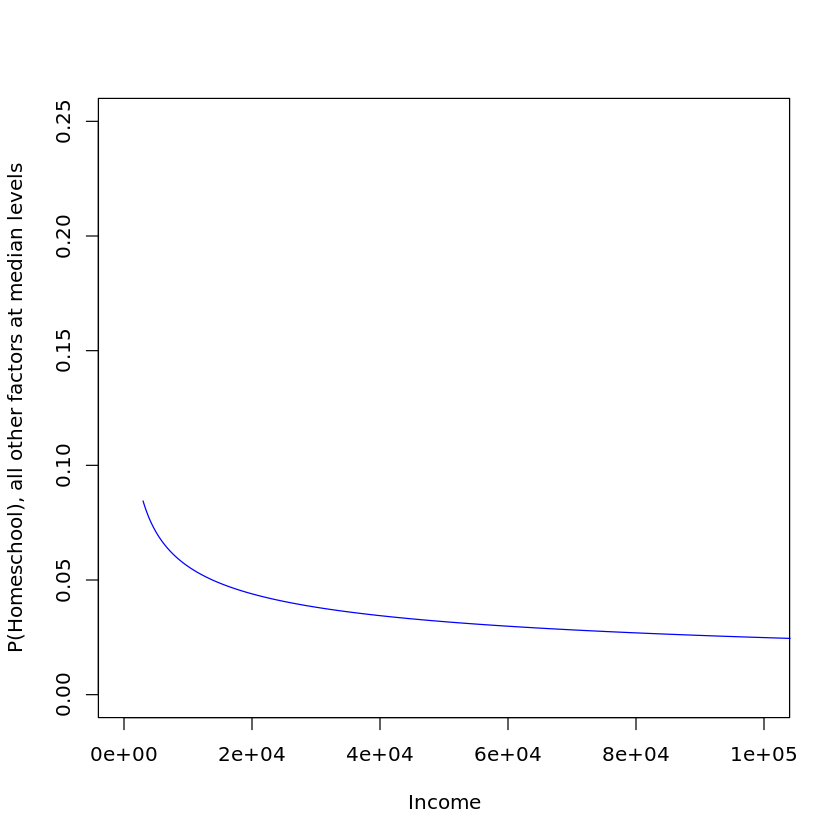

In [14]:
x.star <- data.frame(lnhhinc=seq(8,12,length=100), momed=3,momage=median(homeschooldata$momage), cage=median(homeschooldata$cage), numsib=median(homeschooldata$numsib), cmale=median(homeschooldata$cmale), cwhite=1, cblack=0, region=median(homeschooldata$region), religious=median(homeschooldata$religious))

Incomepred <- exp(x.star$lnhhinc)

medianstu <- data.frame(lnhhinc=median(homeschooldata$lnhhinc), momed=3,momage=median(homeschooldata$momage), cage=median(homeschooldata$cage), numsib=median(homeschooldata$numsib), cmale=median(homeschooldata$cmale), cwhite=1, cblack=0, region=median(homeschooldata$region), religious=median(homeschooldata$religious))

# Predictions for Median Student
median.logit <- predict(out.homeschool, newdata=medianstu, type="link", se.fit=TRUE)
logit.L <- median.logit$fit - 1.96*median.logit$se.fit
logit.U <- median.logit$fit + 1.96*median.logit$se.fit
median.phat.L <- 1/(1+exp(-logit.L))
median.phat.U <- 1/(1+exp(-logit.U))

median.phat.L
median.phat.U

plot(Incomepred,predict(out.homeschool, newdata=x.star, type="response"),  # Type=response for probability
     type="l", xlim=c(0,100000), ylim=c(0,0.25), xlab="Income", ylab="P(Homeschool), all other factors at median levels", col="blue")


###  Creating confidence intervals for probability to add to graph

In [15]:
pr <- predict(out.homeschool, newdata=x.star, type="response")

predict.L <- pr - 1.96*sd(pr)
predict.L2 <- numeric(length(predict.L))
for(i in 1:length(predict.L)){
  predict.L2[i] <- ifelse(predict.L[i]<0, 0, predict.L[i])  # Minimum value for probability = 0
}
predict.U <- pr + 1.96*sd(pr)

lines(Incomepred, predict.L2, col="dark gray")
lines(Incomepred, predict.U, col="dark gray")


ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


### ROC (Receiver Operating Characteristic) Curve

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependencies ‘bitops’, ‘gtools’, ‘gdata’, ‘caTools’, ‘gplots’

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



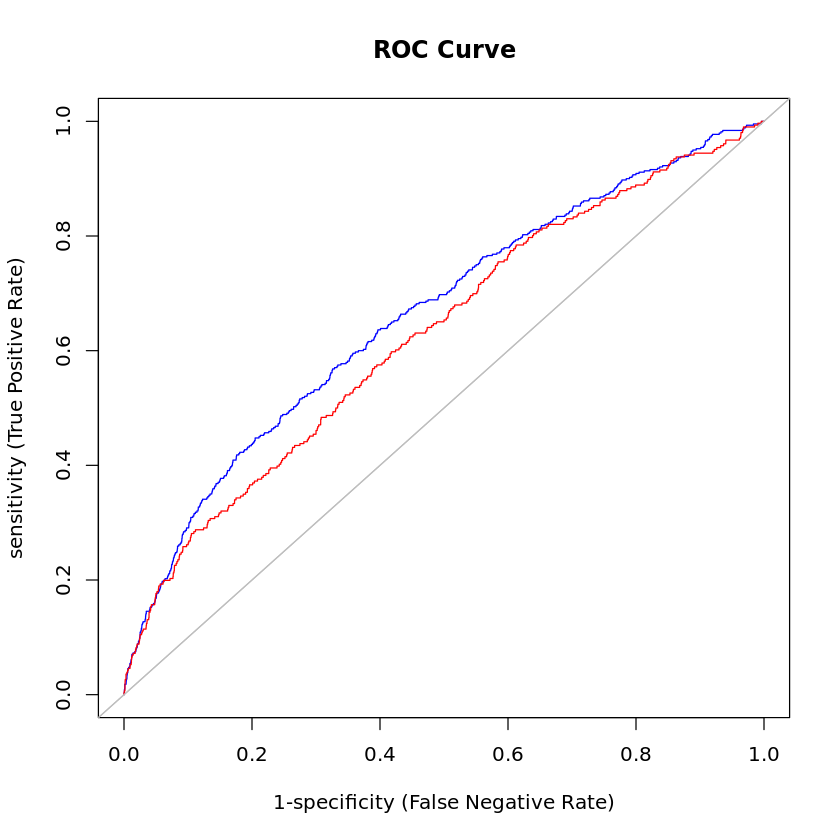

In [17]:
install.packages('ROCR')
library('ROCR')
train.pred <- prediction(predict(out.homeschool,type="response"), homeschool.train$homeschool)   # predictions followed by true values
train.perf <- performance(train.pred, measure="tpr", x.measure="fpr")    # Y-axis: true positive rate, X: false negatives
plot(train.perf,xlab="1-specificity (False Negative Rate)", ylab="sensitivity (True Positive Rate)", main="ROC Curve", col="blue")
abline(0,1, col="gray")


test.pred <- prediction(predict(out.homeschool, newdata=homeschool.test, type="response"), homeschool.test$homeschool)
test.perf <- performance(test.pred, measure="tpr", x.measure="fpr")
plot(test.perf, col="red", add=TRUE) 
abline(0,1,col="gray")

### AUC Curves

In [18]:
#AUC Curve, Training dataset
performance(train.pred, measure="auc")
#AUC Curve, Test dataset
performance(test.pred, measure="auc")


An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.6621299


Slot "alpha.values":
list()


An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.6287496


Slot "alpha.values":
list()


## Model 2: Oversampling non-homeschoolers

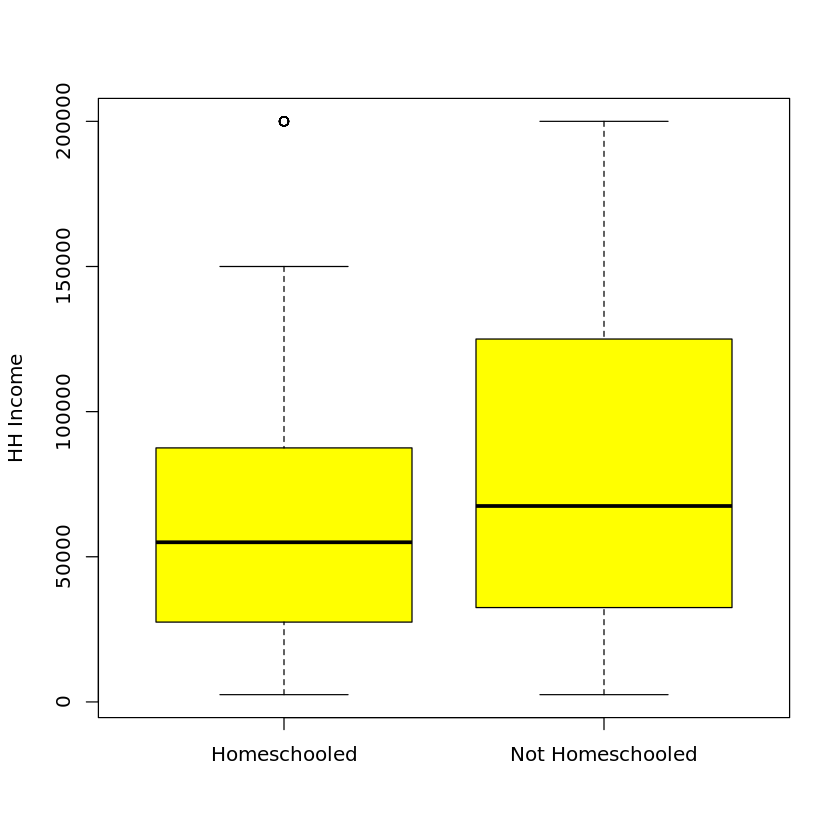

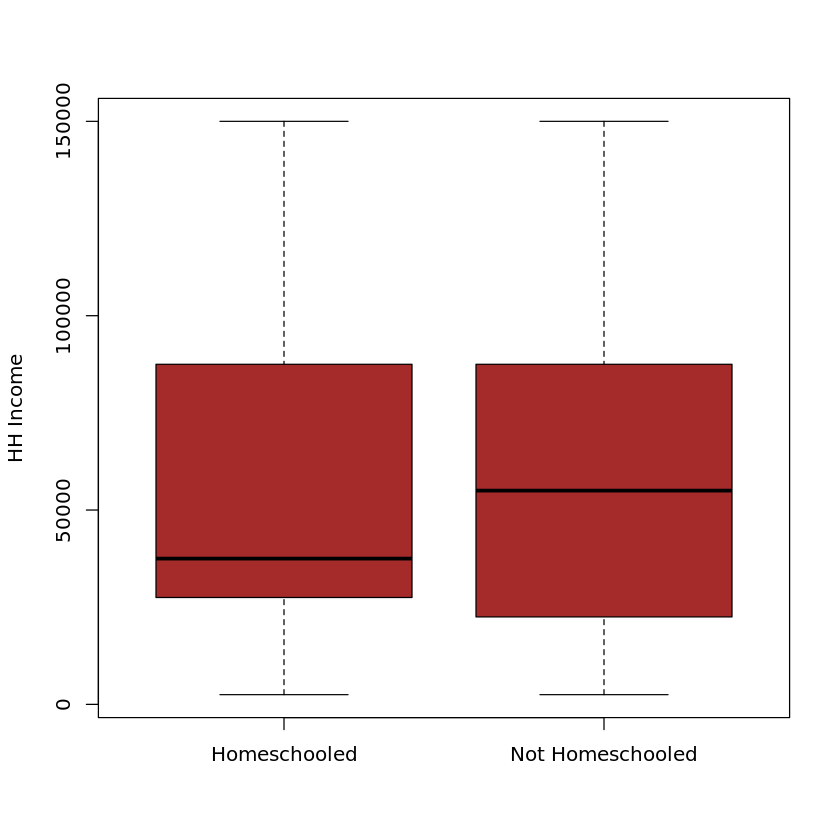

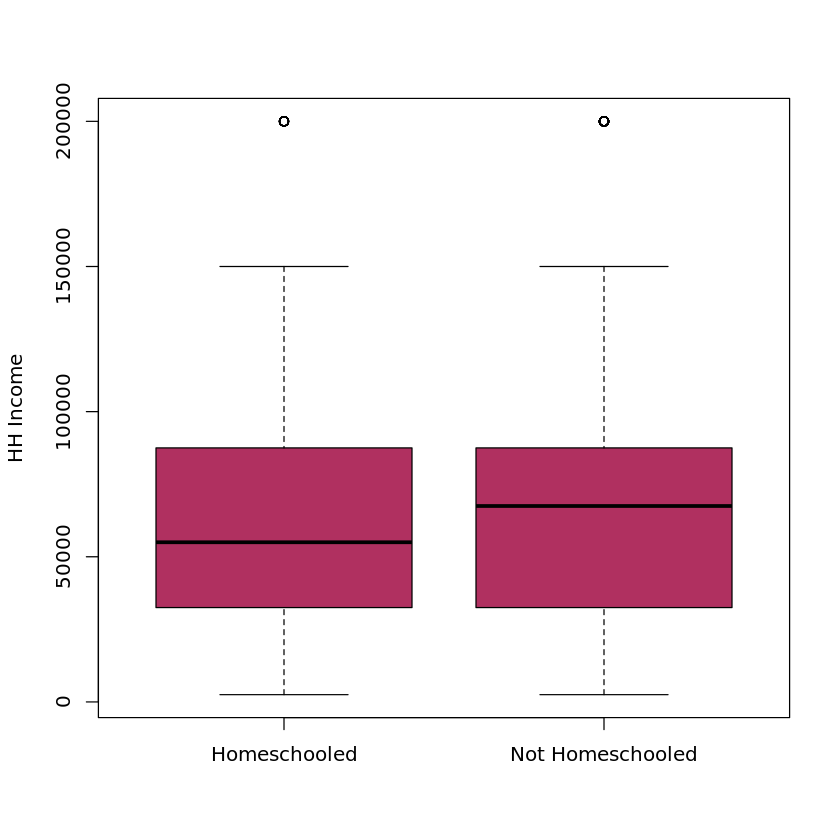

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-10.10267642,-0.8048459
lnhhinc,-0.65597596,0.1315720
momed,-0.21871220,0.4484731
momage,-0.01665112,0.1198328
cage,-0.08758063,0.1432874
numsib,0.20810758,0.7550000
factor(cmale)1,-0.61050810,0.8126838
factor(cwhite)1,-0.68546981,1.3965145
cblack,-1.73636394,1.1342048
factor(region)2,-0.50417900,1.8379875


Waiting for profiling to be done...


,2.5 %,97.5 %
lnhhinc,0.5189354,1.140620
momed,0.8035529,1.565919
momage,0.9834867,1.127308
cage,0.9161450,1.154061
numsib,1.2313456,2.127611
factor(cmale)1,0.5430749,2.253949
factor(cwhite)1,0.5038535,4.041090
cblack,0.1761598,3.108701
factor(region)2,0.6040013,6.283879
factor(region)3,0.1735984,2.894394


           
yhat.train2    0    1
          0 1166   34

$misclassification
[1] 0.0275

$sensitivity
[1] 0

$specificity
[1] 1

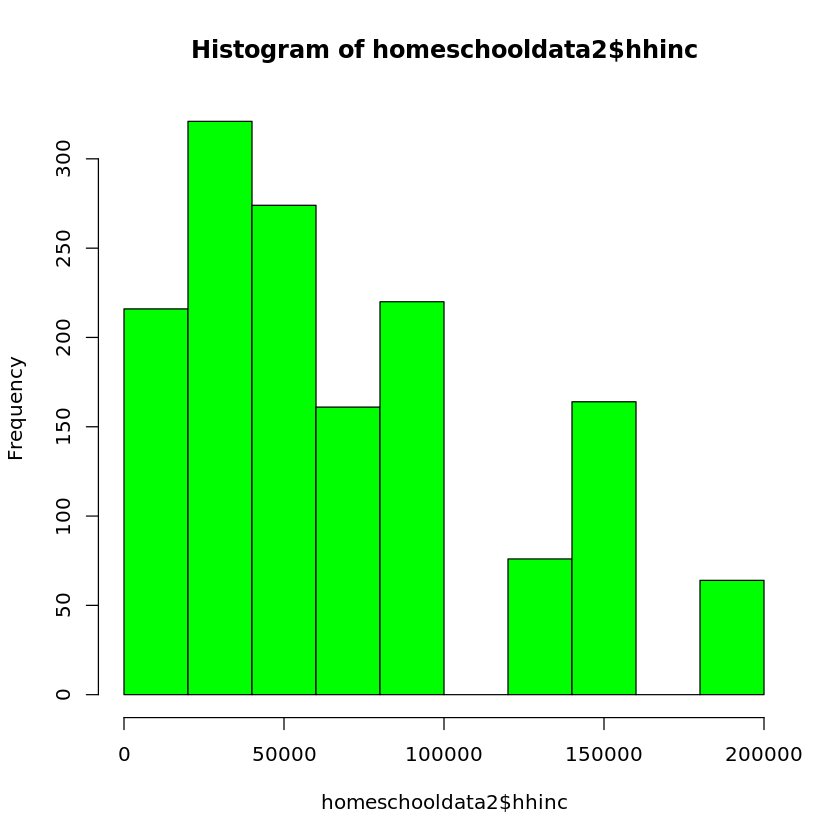

1 
0.02519342

1 
0.03755835

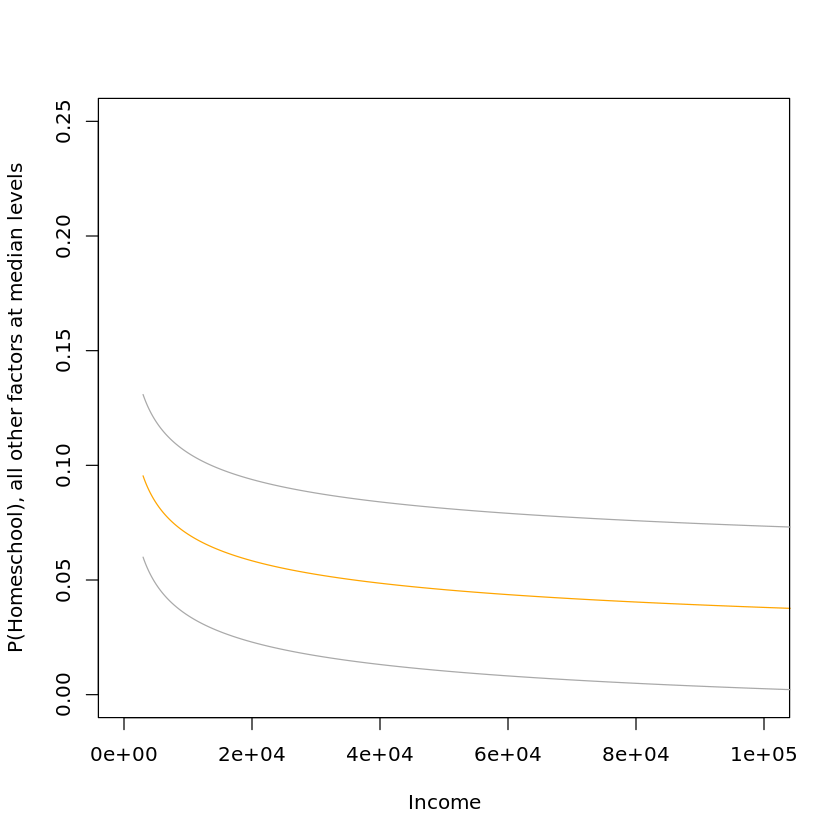

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.7578196


Slot "alpha.values":
list()


An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.6175799


Slot "alpha.values":
list()


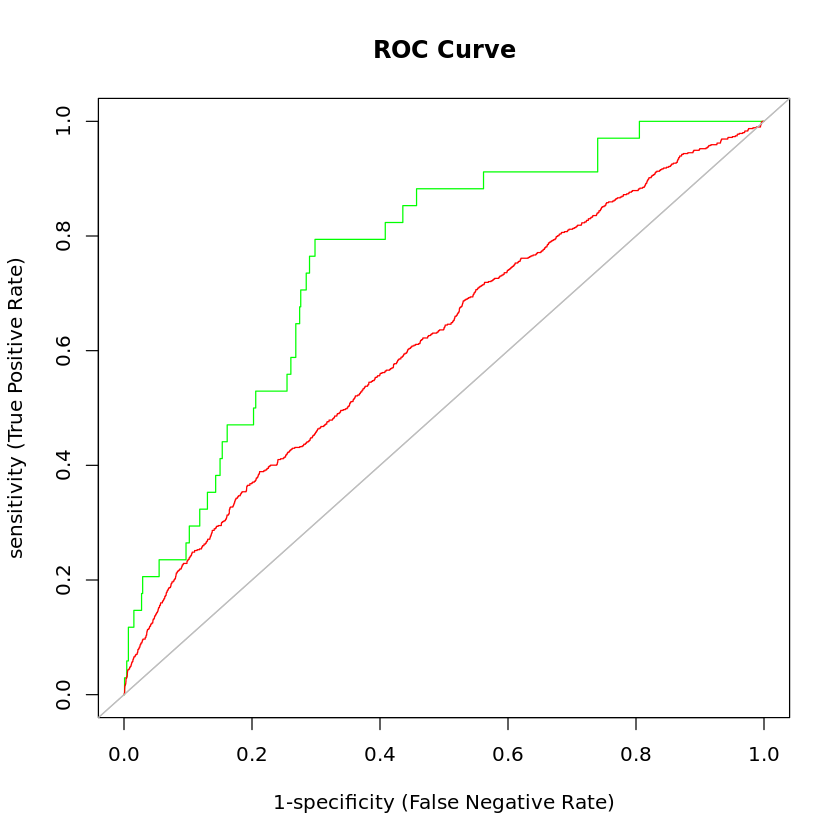

In [19]:

# Create train and test
nohomeschool <- subset(homeschooldata, homeschooldata$homeschool==0)
nohsRows <- sample(1:33700, 750, replace=FALSE)

homeschooldata2 <- rbind(subset(homeschooldata, homeschooldata$homeschool==1), nohomeschool[nohsRows,])




n <- dim(homeschooldata2)[1]
sample.rows <- sample(1:n,1200, replace=FALSE)
homeschool.train2 <- homeschooldata[c(sample.rows),]
homeschool.test2 <- homeschooldata[-c(sample.rows),]


#Summary Statistics and assure similarity between train and test datasets

boxplot(hhinc~hvalue, data=homeschooldata2, col="yellow", labels=c("Not Homeschooled", "Homeschooled"), ylab="HH Income")
boxplot(hhinc~hvalue, data=homeschool.train2, col="brown", labels=c("Not Homeschooled", "Homeschooled"), ylab="HH Income")
boxplot(hhinc~hvalue, data=homeschool.test2, col="maroon", labels=c("Not Homeschooled", "Homeschooled"), ylab="HH Income")

hist(homeschooldata2$hhinc, col="green")


# Data are similar, so we continue.


out.homeschool2 <- glm(homeschool ~ lnhhinc + momed + momage + cage + numsib + factor(cmale) + factor(cwhite) + cblack + factor(region) + factor(religious) , data=homeschool.train2, family="binomial")  

# 95% CI on beta
confint(out.homeschool2)
# 95% CI on exp(beta)
exp(confint(out.homeschool2))[-1,]

yhat.train2 <- as.numeric(predict(out.homeschool2, type="response") > 0.5)  # Note that the maximum probability here is 
# 0.238, i.e., there is nobody who is overall more likely to be homeschooled than not homeschooled.

table(yhat.train2, homeschool.train2$homeschool) # In this model, we find that all our predictions were 0 (that no student was homeschooled)
misclass <- 33/(1167+33) #proportion of "TRUE positive"
sensitivity <- 0   #proportion of "TRUE positive"
specificity <- 1    #proportion of TRUE negatives" (we said they would lose and they actually did)

list(misclassification=misclass, sensitivity=sensitivity, specificity=specificity)


# Demonstrate effect of Income on P(homeschool) holding all else at median values
x.star2 <- data.frame(lnhhinc=seq(8,12,length=100), momed=3, momage=median(homeschooldata2$momage), cage=median(homeschooldata2$cage), numsib=median(homeschooldata2$numsib), cmale=1, cwhite=1, cblack=0, region=median(homeschooldata2$region), religious=median(homeschooldata2$religious))

Incomepred2 <- exp(x.star2$lnhhinc)

plot(Incomepred2,predict(out.homeschool2, newdata=x.star2, type="response"),  # Type=response for probability
     type="l", xlim=c(0,100000), ylim=c(0,0.25), xlab="Income", ylab="P(Homeschool), all other factors at median levels", col="orange")

medianstu2 <- data.frame(lnhhinc=median(homeschooldata2$lnhhinc), momed=3, momage=median(homeschooldata2$momage), cage=median(homeschooldata2$cage), numsib=median(homeschooldata2$numsib), cmale=1, cwhite=1, cblack=0, region=median(homeschooldata2$region), religious=median(homeschooldata2$religious))


# Predictions for Median Student
median.logit2 <- predict(out.homeschool, newdata=medianstu2, type="link", se.fit=TRUE)
logit.L2 <- median.logit2$fit - 1.96*median.logit2$se.fit
logit.U2 <- median.logit2$fit + 1.96*median.logit2$se.fit
median.phat.L2 <- 1/(1+exp(-logit.L2))
median.phat.U2 <- 1/(1+exp(-logit.U2))

median.phat.L2
median.phat.U2


# Creating confidence intervals for probability to add to graph
pr <- predict(out.homeschool2, newdata=x.star2, type="response")

predict.L2 <- pr - 1.96*sd(pr)
predict.L22 <- numeric(length(predict.L))
for(i in 1:length(predict.L2)){
  predict.L22[i] <- ifelse(predict.L2[i]<0, 0, predict.L2[i])  # Minimum value for probability = 0
}
predict.U2 <- pr + 1.96*sd(pr)

lines(Incomepred2, predict.L22, col="dark gray")
lines(Incomepred2, predict.U2, col="dark gray")





#ROC (Receiver Operating Characteristic) Curve
library(ROCR)
train.pred2 <- prediction(predict(out.homeschool2,type="response"), homeschool.train2$homeschool)   # predictions followed by true values
train.perf2 <- performance(train.pred2, measure="tpr", x.measure="fpr")    # Y-axis: true positive rate, X: false negatives
plot(train.perf2,xlab="1-specificity (False Negative Rate)", ylab="sensitivity (True Positive Rate)", main="ROC Curve", col="green")
abline(0,1, col="gray")



test.pred2 <- prediction(predict(out.homeschool2, newdata=homeschool.test2, type="response"), homeschool.test2$homeschool)   # predictions followed by true values
test.perf2 <- performance(test.pred2, measure="tpr", x.measure="fpr")    # Y-axis: true positive rate, X: false negatives
plot(test.perf2,xlab="1-specificity (False Negative Rate)", ylab="sensitivity (True Positive Rate)", main="ROC Curve", col="red", add=TRUE)
abline(0,1, col="gray")



#AUC Curve, Training dataset
performance(train.pred2, measure="auc")
#AUC Curve, Test dataset
performance(test.pred2, measure="auc")


### Model 3: Changing the probability cutoff from 0.5 to 0.15, based off of first model's data (confusion matrix only)

In [20]:

yhat.train <- as.numeric(predict(out.homeschool, type="response") > 0.1)  # Note change of probability cutoff

table(yhat.train, homeschool.train$homeschool) # In this model, we find that all our predictions were 0 (that no student was homeschooled)
misclass <- (432+51)/dim(homeschool)[1] #proportion of "TRUE positive"
sensitivity <-  8/(8+432) #proportion of "TRUE positive"
specificity <- 19509/(19509+51)    #proportion of TRUE negatives" (we said they would lose and they actually did)

list(misclassification=misclass, sensitivity=sensitivity, specificity=specificity)



          
yhat.train     0     1
         0 19509   432
         1    51     8

ERROR: Error in eval(expr, envir, enclos): object 'homeschool' not found
